# Data Clean up and Analysis

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
ls

README                       u2.base
allbut.pl*                   u2.test
clean_up_and_analysis.ipynb  u3.base
mku.sh*                      u3.test
u.data                       u4.base
u.genre                      u4.test
u.info                       u5.base
u.item                       u5.test
u.occupation                 ua.base
u.user                       ua.test
u1.base                      ub.base
u1.test                      ub.test


In [4]:
df_ratings = pd.read_csv('u.data', delimiter='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])

In [5]:
df_ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
def ratings_clean_up(df):
    df.drop(columns=['timestamp'], inplace=True)
    df.drop(df[df['rating'] ==1].index, inplace=True)

ratings_clean_up(df_ratings)
df_ratings.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
3,244,51,2
5,298,474,4
6,115,265,2


In [7]:
df_ratings.rating.value_counts()

4    34174
3    27145
5    21201
2    11370
Name: rating, dtype: int64

<BarContainer object of 4 artists>

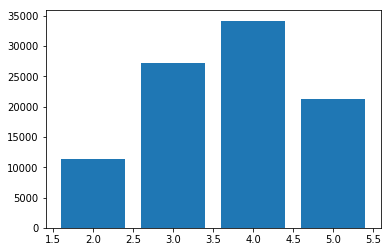

In [8]:
plt.bar(df_ratings.rating.value_counts().index, df_ratings.rating.value_counts().values)

# Genre: List of genre

In [9]:
df_genres = pd.read_csv('u.genre' , delimiter='|', names=['type', 'index'])
df_genres

,type,index
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [10]:
list_of_genres = list(df_genres['type'])

# df_movies: Info about the movies available

In [11]:
df_movies = pd.read_csv('u.item', delimiter='|', encoding='latin-1', names = ['item_id', 'title', 'release_date','nan_vals',
                                                                             'imdb'] + list_of_genres, index_col ='item_id' )
df_movies.head()

,title,release_date,nan_vals,imdb,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
item_id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
def movies_clean_up(df):
    df.drop(columns=['nan_vals'], inplace=True)
    df.drop(df[df['unknown'] == 1].index, inplace=True)
    df.drop(columns=['unknown', 'release_date', 'imdb'], inplace=True)
    df.reset_index(inplace=True)
    
movies_clean_up(df_movies)
df_movies.head()

,item_id,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


# df_users: Info about past users who have done ratings

In [13]:
df_users = pd.read_csv('u.user', names = ['user_id', 'age', 'gender', 'occupation', 'zip_code'], delimiter='|')

In [14]:
df_users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [15]:
df_users.occupation.unique()

array(['technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired', 'salesman', 'doctor'],
      dtype=object)

In [16]:
def users_clean_up(df):
    df.drop(columns=['zip_code'], inplace=True)
    df.drop(df_users[df_users['occupation'] == "other"].index, inplace=True)
    df.drop(df_users[df_users['occupation'] == "none"].index, inplace=True)
    df.reset_index(inplace=True, drop=True)

users_clean_up(df_users)
df_users.occupation.value_counts()
df_users_labelled = df_users.copy()
df_users_clusters =df_users.copy()

In [17]:
df_users.gender.value_counts()

M    596
F    233
Name: gender, dtype: int64

## One hot encoding categorical variables

In [18]:
df_users = df_users.join(pd.get_dummies(df_users['gender']))
df_users = df_users.join(pd.get_dummies(df_users['occupation']))
df_users.drop(columns=['gender', 'occupation'], inplace=True)
df_users.head()

,user_id,age,F,M,administrator,artist,doctor,educator,engineer,entertainment,...,lawyer,librarian,marketing,programmer,retired,salesman,scientist,student,technician,writer
0,1,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,23,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,42,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,57,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_users.shape

(829, 23)

In [20]:
df_users[df_users['student'] == 1].age.value_counts()

20    25
19    21
22    21
17    13
18    13
21    13
23    11
25    11
24     8
28     8
26     7
27     7
15     5
29     5
16     4
14     3
30     3
32     3
13     3
31     2
34     2
35     2
10     1
42     1
40     1
36     1
38     1
7      1
Name: age, dtype: int64

In [24]:
df_test = df_users.copy()
df_test.head()

,user_id,age,F,M,administrator,artist,doctor,educator,engineer,entertainment,...,lawyer,librarian,marketing,programmer,retired,salesman,scientist,student,technician,writer
0,1,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,23,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,4,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,42,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,57,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
errors = []

def get_errors(centre, df):
    
    return mean_squared_error([centre]*df.shape[0], df).mean()

for i in range(3,15):
    clf_error = []
    kmean = KMeans(n_clusters=i)
    kmean.fit(df_test.drop(columns=['user_id']))
    cluster_vector = [kmean.cluster_centers_[j] for j in range(len(kmean.cluster_centers_))]
    df = df_test.join(pd.DataFrame(kmean.labels_, columns=['cluster']))
    for index, centroid in enumerate(cluster_vector):
        clf_error.append(get_errors(centroid, df[df['cluster'] == index].drop(columns=['cluster', 'user_id'])))
        
    errors.append(sum(clf_error)/ len(clf_error))


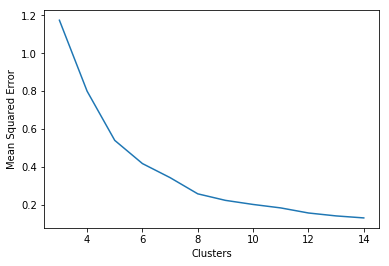

In [26]:
plt.xlabel("Clusters")
plt.ylabel("Mean Squared Error")
plt.plot(range(3,15), errors)

## Using 7 clusters as the elbow point

In [27]:
k = KMeans(n_clusters=7)

In [28]:
k.fit(df_users.drop(columns=['user_id']))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [29]:
k.cluster_centers_

array([[ 3.59384615e+01,  2.84615385e-01,  7.15384615e-01,
         1.30769231e-01,  3.84615385e-02,  2.25514052e-17,
         1.46153846e-01,  1.30769231e-01,  2.30769231e-02,
         5.38461538e-02, -1.38777878e-17,  7.69230769e-03,
         2.30769231e-02,  5.38461538e-02,  6.92307692e-02,
         9.23076923e-02,  4.51028104e-17,  3.07692308e-02,
         8.46153846e-02,  4.61538462e-02,  3.84615385e-02,
         3.07692308e-02],
       [ 2.35459770e+01,  2.12643678e-01,  7.87356322e-01,
         6.32183908e-02,  3.44827586e-02,  2.94902991e-17,
         4.02298851e-02,  8.04597701e-02,  4.59770115e-02,
         3.44827586e-02,  1.14942529e-02,  1.14942529e-02,
         5.74712644e-03,  2.29885057e-02,  1.14942529e-02,
         8.62068966e-02,  5.89805982e-17,  1.14942529e-02,
         2.29885057e-02,  4.08045977e-01,  5.17241379e-02,
         5.74712644e-02],
       [ 5.02072072e+01,  3.51351351e-01,  6.48648649e-01,
         1.80180180e-01,  9.00900901e-03,  9.00900901e-03,
    

In [30]:
df_users_labelled = df_users_labelled.join(pd.DataFrame(k.labels_, columns=['cluster']))

In [31]:
df_users_labelled.head()

,user_id,age,gender,occupation,cluster
0,1,24,M,technician,1
1,3,23,M,writer,1
2,4,24,M,technician,1
3,6,42,M,executive,4
4,7,57,M,administrator,3


In [32]:
df_test = df_users_labelled.copy()

In [33]:
for i in range(8):
    print("Number of cluster ")
    print(i)
    print(df_test[df_test.cluster == i].occupation.value_counts())
    print("Age: ")
    print(df_test[df_test.cluster == i].age.describe())

Number of cluster 
0
educator         19
engineer         17
administrator    17
programmer       12
scientist        11
marketing         9
executive         7
librarian         7
student           6
artist            5
technician        5
writer            4
salesman          4
lawyer            3
entertainment     3
homemaker         1
Name: occupation, dtype: int64
Age: 
count    130.000000
mean      35.938462
std        2.067669
min       33.000000
25%       34.000000
50%       36.000000
75%       38.000000
max       39.000000
Name: age, dtype: float64
Number of cluster 
1
student          71
programmer       15
engineer         14
administrator    11
writer           10
technician        9
entertainment     8
educator          7
executive         6
artist            6
scientist         4
librarian         4
salesman          2
homemaker         2
marketing         2
healthcare        2
lawyer            1
Name: occupation, dtype: int64
Age: 
count    174.000000
mean      23.54597

## YEEET YEEET LOOKS SOLID but also need to include user-preference

In [62]:
df_users_labelled.cluster.value_counts()

1    174
5    168
0    130
2    111
6     99
4     98
3     49
Name: cluster, dtype: int64

## Working on including user preference and then doing KMeans Clustering again

In [63]:
df_ratings.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
3,244,51,2
5,298,474,4
6,115,265,2


In [64]:
df_movies.head()

,item_id,title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [65]:
df = df_ratings.merge(df_movies.drop(columns=['title']), on='item_id')

## User Preferences DF

In [69]:
df_test = df.merge(df_users_labelled[['user_id']], on='user_id')
user_pref = df_test.drop(columns=['rating', 'item_id']).groupby('user_id').mean().reset_index()
user_pref.head()

,user_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.264228,0.126016,0.044715,0.056911,0.321138,0.085366,0.020325,0.414634,0.008130,0.004065,0.048780,0.040650,0.016260,0.174797,0.170732,0.203252,0.097561,0.024390
1,3,0.260870,0.086957,0.000000,0.000000,0.195652,0.173913,0.021739,0.391304,0.000000,0.043478,0.086957,0.043478,0.239130,0.108696,0.152174,0.347826,0.086957,0.000000
2,4,0.333333,0.166667,0.000000,0.000000,0.166667,0.166667,0.041667,0.250000,0.000000,0.000000,0.041667,0.041667,0.208333,0.125000,0.250000,0.458333,0.083333,0.000000
3,6,0.112745,0.093137,0.049020,0.083333,0.308824,0.068627,0.004902,0.504902,0.009804,0.029412,0.019608,0.063725,0.053922,0.196078,0.063725,0.117647,0.102941,0.024510
4,7,0.236504,0.149100,0.033419,0.092545,0.221080,0.082262,0.012853,0.372751,0.017995,0.028278,0.102828,0.066838,0.048843,0.141388,0.118252,0.192802,0.105398,0.046272


In [40]:
df_test = df_users.merge(user_pref, on='user_id')
df_test.head()

,user_id,age,F,M,administrator,artist,doctor,educator,engineer,entertainment,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,0,1,0,0,0,0,0,0,...,0.008130,0.004065,0.048780,0.040650,0.016260,0.174797,0.170732,0.203252,0.097561,0.024390
1,3,23,0,1,0,0,0,0,0,0,...,0.000000,0.043478,0.086957,0.043478,0.239130,0.108696,0.152174,0.347826,0.086957,0.000000
2,4,24,0,1,0,0,0,0,0,0,...,0.000000,0.000000,0.041667,0.041667,0.208333,0.125000,0.250000,0.458333,0.083333,0.000000
3,6,42,0,1,0,0,0,0,0,0,...,0.009804,0.029412,0.019608,0.063725,0.053922,0.196078,0.063725,0.117647,0.102941,0.024510
4,7,57,0,1,1,0,0,0,0,0,...,0.017995,0.028278,0.102828,0.066838,0.048843,0.141388,0.118252,0.192802,0.105398,0.046272


## Now that we have both the user preference and user occupation, we gonna try and do KMeans

In [46]:
errors = []

def get_errors(centre, df):
    
    return mean_squared_error([centre]*df.shape[0], df).mean()

for i in range(3,25):
    clf_error = []
    kmean = KMeans(n_clusters=i)
    kmean.fit(df_test.drop(columns=['user_id']))
    cluster_vector = [kmean.cluster_centers_[j] for j in range(len(kmean.cluster_centers_))]
    df = df_test.join(pd.DataFrame(kmean.labels_, columns=['cluster']))
    for index, centroid in enumerate(cluster_vector):
        clf_error.append(get_errors(centroid, df[df['cluster'] == index].drop(columns=['cluster', 'user_id'])))
        
    errors.append(sum(clf_error)/ len(clf_error))




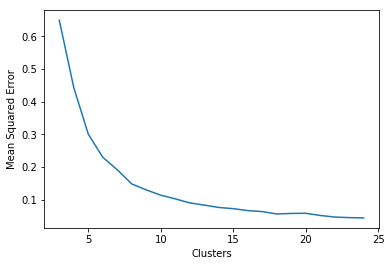

In [47]:
plt.xlabel("Clusters")
plt.ylabel("Mean Squared Error")
plt.plot(range(3, 25), errors)

In [48]:
k = KMeans(n_clusters=7)
k.fit(df_test.drop(columns=['user_id']))
df_users_clusters = df_users_clusters.join(pd.DataFrame(k.labels_, columns=['cluster']))
df_users_clusters.head()

,user_id,age,gender,occupation,cluster
0,1,24,M,technician,6
1,3,23,M,writer,6
2,4,24,M,technician,6
3,6,42,M,executive,3
4,7,57,M,administrator,4


In [49]:
for i in df_users_clusters.cluster.unique():
    print(df_users_clusters[df_users_clusters.cluster == i].occupation.value_counts())
    print(df_users_clusters[df_users_clusters.cluster == i].age.describe())

student          64
engineer         13
programmer       13
administrator     9
technician        8
writer            7
entertainment     7
artist            6
educator          4
scientist         3
marketing         2
executive         2
salesman          2
librarian         2
lawyer            1
homemaker         1
healthcare        1
Name: occupation, dtype: int64
count    145.000000
mean      23.055172
std        1.408207
min       21.000000
25%       22.000000
50%       23.000000
75%       24.000000
max       25.000000
Name: age, dtype: float64
educator         18
engineer         17
scientist        14
administrator    13
librarian        10
programmer        9
executive         8
writer            8
artist            7
marketing         6
technician        3
student           3
healthcare        3
entertainment     2
doctor            2
homemaker         1
salesman          1
Name: occupation, dtype: int64
count    125.000000
mean      41.224000
std        2.303097
min       38

## Now the cluster look solid

In [50]:
df_users_clusters.head()

,user_id,age,gender,occupation,cluster
0,1,24,M,technician,6
1,3,23,M,writer,6
2,4,24,M,technician,6
3,6,42,M,executive,3
4,7,57,M,administrator,4


In [51]:
df_users_clusters.cluster.value_counts()

0    173
6    145
3    125
1    122
5    116
2     99
4     49
Name: cluster, dtype: int64

In [52]:
df = df_ratings.merge(df_movies, on='item_id')

In [53]:
df.head()

,user_id,item_id,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,63,242,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,226,242,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,154,242,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,306,242,5,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df = df.merge(df_users_clusters[['user_id', 'cluster']], on='user_id')
df.head()

,user_id,item_id,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
0,196,242,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,196,257,2,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,196,111,4,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,196,25,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,196,382,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
cluster_1 = df[df['cluster'] == 1]
cluster_1.head()

,user_id,item_id,rating,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
0,196,242,3,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,196,257,2,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,196,111,4,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,196,25,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,196,382,4,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [70]:
movie_rating = cluster_1.groupby('item_id')['rating', 'cluster'].mean().reset_index()
movie_rating.head()

,item_id,rating,cluster
0,1,3.627907,1
1,2,3.375000,1
2,3,3.000000,1
3,4,3.687500,1
4,5,3.600000,1


In [71]:
movie_pref = cluster_1.drop(columns=['user_id', 'rating']).reset_index()
movie_pref.sort_values(by='item_id').head()

,index,item_id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,cluster
7667,49117,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4690,26756,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6048,36641,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3245,21377,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10574,80360,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
a